# Read Data

In [1]:
import pandas as pd
data=pd.read_csv('Iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### It has four features and 3 classes 
##### Consider only two classes and two features 
##### Store two classes in dictionary d with keys -1 and 1 

In [2]:
# Considering only two classes

from collections import defaultdict
dtrain=defaultdict(list)
for i in range(102):
    if data.loc[i,'species']=='setosa':
        
        key=1
    elif data.loc[i,'species']=='versicolor':
        key=-1
    else:
        continue
    dtrain[key].append([data.loc[i,'sepal_length'],data.loc[i,'sepal_width']])
   

# Visualize data

In [3]:
import matplotlib.pyplot as plt
def plot(x1,x2,title='Data'):
                   
    plt.plot(x1[0],x1[1],'o',label='-1')
    plt.plot(x2[0],x2[1],'o',label='1')
    plt.title(title)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')


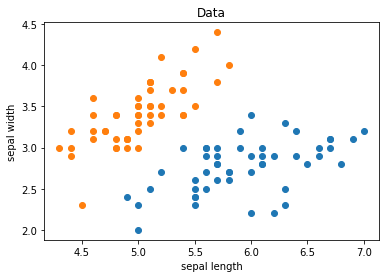

In [4]:
import numpy as np
class1t=np.transpose(dtrain[-1])
class2t=np.transpose(dtrain[1])
plot(class1t,class2t)  #d[-1]: (no.of data points,2)--> d[-1]': (2,no.of data points)

##### x1: input (features)
#### y1: output(labels/corresponding classes)

In [5]:
x1=np.concatenate((np.array(dtrain[-1]),np.array(dtrain[1])))   # first 50 rows are of class -1 and last 50 rows are of class 1
y1=np.concatenate((np.zeros((len(dtrain[-1]),1)),(np.ones((len(dtrain[1]),1)))))
m,n=np.shape(x1)

##### Add a column of ones for at index 0 to represent $x_0$

In [6]:
x1=np.concatenate((np.ones((len(x1),1)),x1),axis=1)
np.shape(x1)

(100, 3)

# Split the data into training and testing data

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=40)

# separate train data with respect to classes to visualize

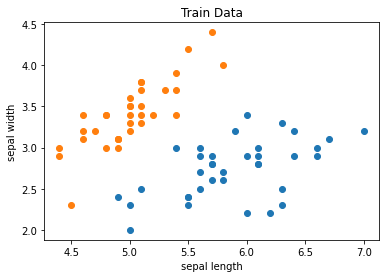

In [8]:
c1train=np.transpose(xtrain[np.where(ytrain==0)[0]][:,1:])
c2train=np.transpose(xtrain[np.where(ytrain==1)[0]][:,1:])
plot(c1train,c2train,title='Train Data')

# separate train data with respect to classes to visualize

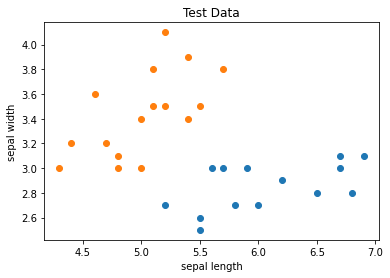

In [9]:
c1test=np.transpose(xtest[np.where(ytest==0)[0]][:,1:])
c2test=np.transpose(xtest[np.where(ytest==1)[0]][:,1:])
plot(c1test,c2test,title='Test Data')

# Train the data

In [10]:
def train(x1,y1,epochs=10000):
    # Initialize weights
    m,n=np.shape(x1)
    W=np.ones((n,1))
    alpha=0.001  # Learning factor
    for i in range(epochs):
        h=np.dot(x1,W)
        np.shape(h)
        h1=1/(1 + np.exp(-h))
        #err=(1/m)*np.sum(np.multiply(y,np.log(h1)),np.multiply(1-y,np.log(1-h1)))
        e=h1-y1
        W=W-((alpha/m)*np.dot(np.transpose(x1),e))
    return W,h1
        

In [11]:
W,h1=train(xtrain,ytrain)

# To continue training 

In [12]:
def continue_train(x1,y1,W,epochs=10000):
    # Initialize weights
    m,n=np.shape(x1)
    alpha=0.001  # Learning factor
    for i in range(epochs):
        h=np.dot(x1,W)
        np.shape(h)
        h1=1/(1 + np.exp(-h))
        #err=(1/m)*np.sum(np.multiply(y,np.log(h1)),np.multiply(1-y,np.log(1-h1)))
        e=h1-y1
        W=W-((alpha/m)*np.dot(np.transpose(x1),e))
    return W,h1
        

In [13]:
W,h1=continue_train(xtrain,ytrain,W)

**Range of predicted output is [0,1]**
# Write a function to classify them in to two classes

In [14]:
def classify(h):
    for i in range(len(h)):
        if h[i]>0.5:
            h[i]=1
        else:
            h[i]=0

    return h
    

In [15]:
x=xtrain[:,1:]    # Leaving first column 
print(x.shape)

(70, 2)


In [16]:
htrain=classify(h1)

### Plot Predicted Decision boundary

In [17]:
def plotdecisionboundary(W,c1,c2):
    x1,y1=(0,-W[0]/W[2])
    x2,y2=(-W[0]/W[1],0)
    m=(y2-y1)/(x2-x1)
    x=np.arange(min(c2[0]),max(c1[0]),0.001)
    y=m*(x-x1)+y1
    
    plt.plot(c1[0],c1[1],'o',label='-1')
    plt.plot(c2[0],c2[1],'o',label='1')
    
    plt.plot(x,y)
    plt.title('Data')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')

    

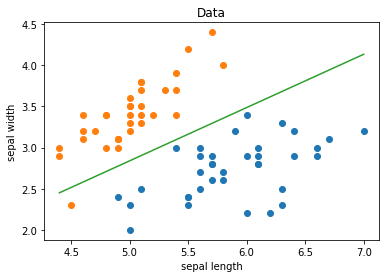

In [18]:
plotdecisionboundary(W,c1train,c2train)

# Predict output on new(test) data

In [19]:
def predict(xtest):
    m,n=np.shape(xtest)
    alpha=0.001  # Learning factor
    h=np.dot(xtest,W)
    h=1/(1 + np.exp(-h))
        #err=(1/m)*np.sum(np.multiply(y,np.log(h1)),np.multiply(1-y,np.log(1-h1)))
    h=classify(h)
    return h
    

In [20]:
htest=predict(xtest)


# Plot decision boundary of testing data

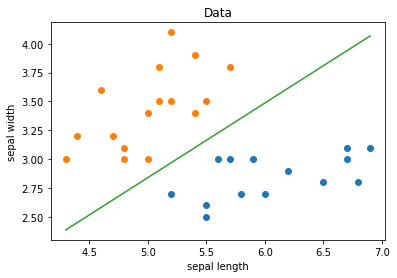

In [21]:
plotdecisionboundary(W,c1test,c2test)

# Evaluate:
## Confusion Matrix

|    |h=1|h=0|
|:-:|:-:|:-:|
|y=1|True Positive|False Negative|
|y=0|False Positive|True Negative|  

## Accuracy 

$\dfrac{h==y}{no.of samples}$

$\dfrac{TP+TN}{TP+TN+FP+FN}$


## Precision    

$\dfrac{h=1,y=1}{h=1}$   

$\dfrac{TP}{TP+FP}$  

## Recall

$\dfrac{h=1,y=1}{y=1}$

$\dfrac{TP}{TP+FN}$





In [22]:
def evaluate(h,y):
    accuracy=np.sum(h==y)/len(h)
    precision=np.sum(np.logical_and(h==1,y==1))/np.sum(h==1)
    recall=np.sum(np.logical_and(h==1,y==1))/np.sum(y==1)
    return accuracy,precision,recall
    

# Evaluation on training data

In [23]:
accuracy,precision,recall=evaluate(htrain,ytrain)
print('For training')
print('accuracy:{:.2%}\nprecision:{:.2%}\nrecall:{:.2%}'.format(accuracy,precision,recall))

For training
accuracy:98.57%
precision:100.00%
recall:97.06%


# Evaluation on Training data

In [24]:
accuracy,precision,recall=evaluate(htest,ytest)
print('For testing')
print('accuracy:{:.2%}\nprecision:{:.2%}\nrecall:{:.2%}'.format(accuracy,precision,recall))

For testing
accuracy:100.00%
precision:100.00%
recall:100.00%
